<a href="https://colab.research.google.com/github/kahuroA/Descriptive-Statistics-Excercises/blob/main/Copy_of_Univariate_Analysis_Exploratory_Data_Analysis_(Exercise_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis: Univariate Analysis

## 1. Defining the Question

### a) Specifying the Question

> How can a US insurance company determine the top 10 cities where its clients have the highest annual income for persons aged 40 and below? 

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the Data from the source i.e. csv
# Dataset url = http://bit.ly/MedicalCitiesIncomeDataset
#
income_df=pd.read_csv('http://bit.ly/MedicalCitiesIncomeDataset')
income_df.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
print('The dataset has {} rows and {} columns'.format(income_df.shape[0], income_df.shape[1]))

The dataset has 150000 rows and 6 columns


In [4]:
# Previewing the top of our dataset
income_df.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [5]:
# Previewing the bottom of our dataset
income_df.tail()

,Number,City,Gender,Age,Income,Illness
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No
149999,150000,Austin,Female,37,87251.0,No


In [6]:
# Checking whether each column has an appropriate datatype
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

In [ ]:
income_df.groupby('City')['Income'].median()

City
Austin              90278.5
Boston              91607.0
Dallas              45268.0
Los Angeles         95291.0
Mountain View      135220.0
New York City       96920.0
San Diego          100859.0
Washington D.C.     71230.0
Name: Income, dtype: float64

Comparing the median incomes above with the data from https://www.statista.com/statistics/205609/median-household-income-in-the-top-20-most-populated-cities-in-the-us/  We canconclude that the data provided is reasonable

## 5. Tidying the Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


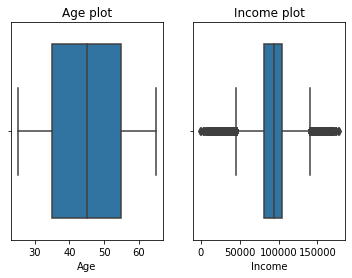

In [8]:
# Checking for Outliers
#plot 1
plt.subplot(1,2,1)
sns.boxplot(income_df['Age'])
plt.title("Age plot")

#lot 2
plt.subplot(1,2,2)
sns.boxplot(income_df['Income'])
plt.title("Income plot")

plt.show()


In [9]:
# Checking for Anomalies
#check for duplicates
income_df.duplicated().sum()

0

In [10]:

income_df['Income'].describe()

count    150000.000000
mean      91252.798273
std       24989.500948
min        -654.000000
25%       80867.750000
50%       93655.000000
75%      104519.000000
max      177157.000000
Name: Income, dtype: float64

There is a negative income in the income variable. This is an anomaly in this variable

In [11]:
# Identifying the Missing Data
income_df.isnull().values.any()

False

In [12]:
# Dealing with the Missing Data
#No missing data

In [13]:
# More data cleaning procedures
#let us remove the row with the negative income
new_df=income_df.drop(income_df[income_df['Income']<0].index)

In [14]:
#let us create a function for removing outliers using the IQR method
def IQR_Method(data, column):
  data1=data.copy()
  first_quartile, third_quartile=np.percentile(data1[column],[25,75])
  IQR=third_quartile-first_quartile
  lower_limit=first_quartile-(1.5*IQR)
  upper_limit=third_quartile+(1.5*IQR)
  return data1[(data1[column]>=lower_limit) & (data1[column]<=upper_limit)]



In [15]:
#drop the Number column
new_df.drop(['Number'], axis=1, inplace=True)

In [16]:
data_clean=IQR_Method(new_df, 'Income')

In [17]:
data_clean.describe()

,Age,Income
count,135217.000000,135217.000000
mean,44.948594,93343.958726
std,11.571969,18705.260143
min,25.000000,45394.000000
25%,35.000000,83793.000000
50%,45.000000,94341.000000
75%,55.000000,104132.000000
max,65.000000,139994.000000


## 6. Exploratory Analysis

(array([ 9781., 50304., 32172.,     0.,  9458.,  8301.,     0.,  8029.,
         4880., 12292.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

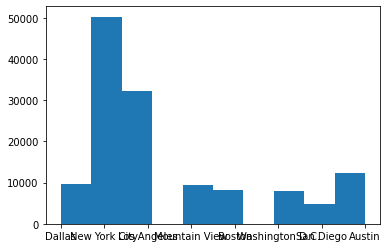

In [ ]:
# Ploting the univariate summaries and recording our observations
#plot city column

plt.hist(data_clean['City'])

(array([76276.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 58941.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

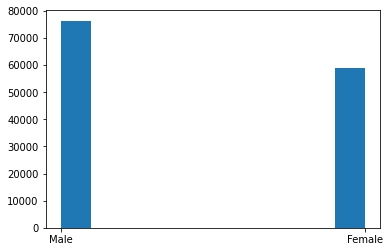

In [ ]:
plt.hist(data_clean['Gender'])

In [18]:
data_clean.head()

,City,Gender,Age,Income,Illness
2,Dallas,Male,42,52483.0,No
4,Dallas,Male,46,50289.0,No
5,Dallas,Female,36,50786.0,No
8,Dallas,Male,51,68667.0,No
9,Dallas,Female,30,50082.0,No


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


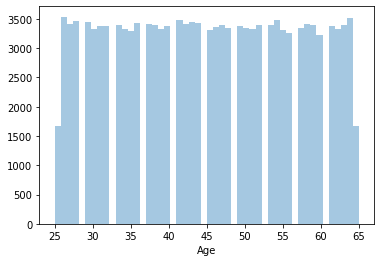

In [24]:
#plot the Age column
sns.distplot(data_clean.Age, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


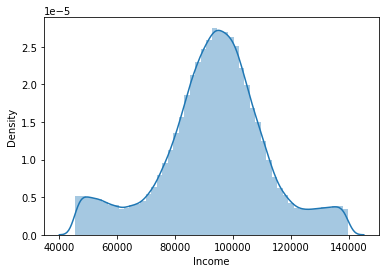

In [27]:
#plot the income column
sns.distplot(data_clean.Income)

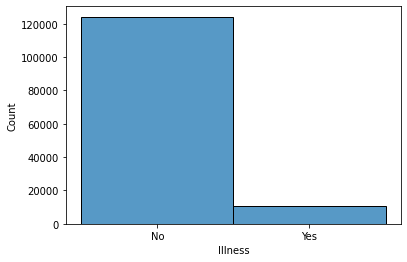

In [30]:
#plot the Illness column
sns.histplot(data_clean.Illness)

## 7. Implementing the Solution

In [31]:
# Implementing the Solution
# filter data to only age 40 and below
df_copy=data_clean.copy()
df_filt=df_copy[df_copy['Age']<=40]

In [34]:
#Order the data in decreasing order in the income column
df_filt.sort_values('Income', ascending=False).head(10)

,City,Gender,Age,Income,Illness
114329,Mountain View,Male,37,139988.0,No
105526,Mountain View,Female,38,139983.0,No
108443,Mountain View,Male,40,139974.0,No
114337,Mountain View,Male,33,139973.0,No
113436,Mountain View,Male,27,139968.0,No
114720,Mountain View,Male,32,139967.0,No
110296,Mountain View,Male,28,139967.0,No
108604,Mountain View,Male,30,139963.0,No
110700,Mountain View,Male,29,139961.0,Yes
113507,Mountain View,Male,26,139946.0,No


## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

# b). Do we need other data to answer our question?

### c). Did we have the right question?